<a href="https://colab.research.google.com/github/kesantos2/EPSL/blob/main/NEC_CO2_(Feb_3_14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Raw Line Graph of All things**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


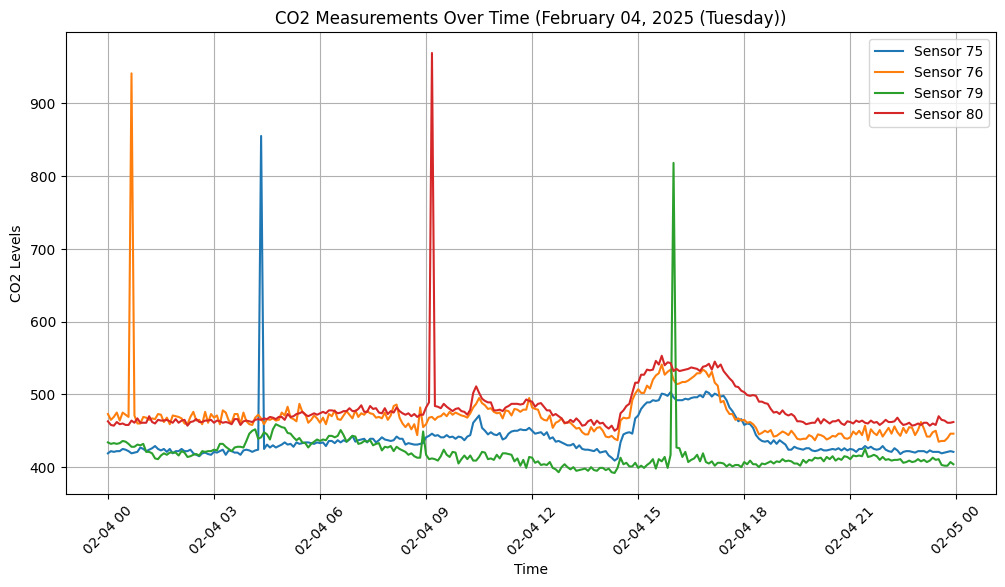

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


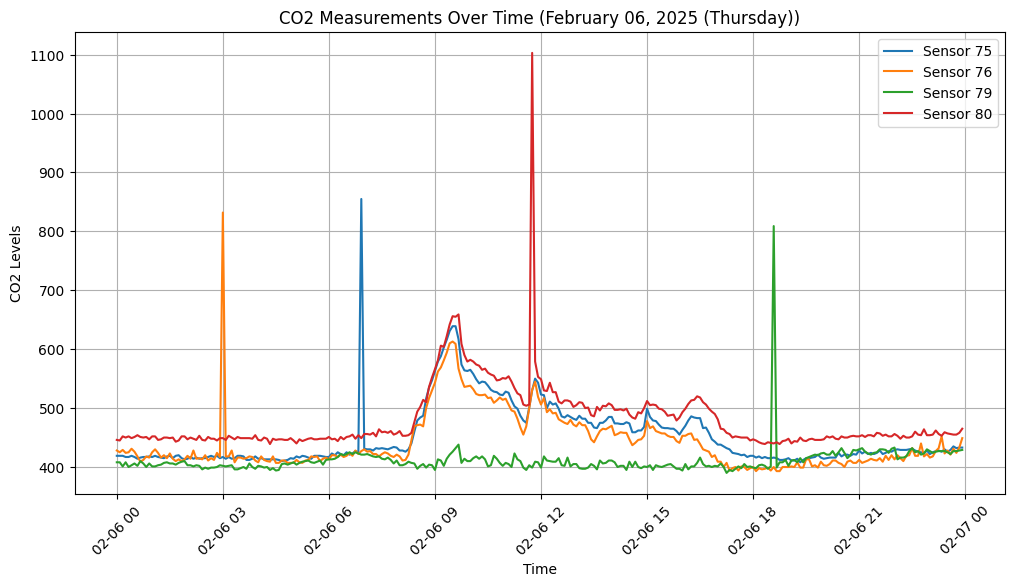

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


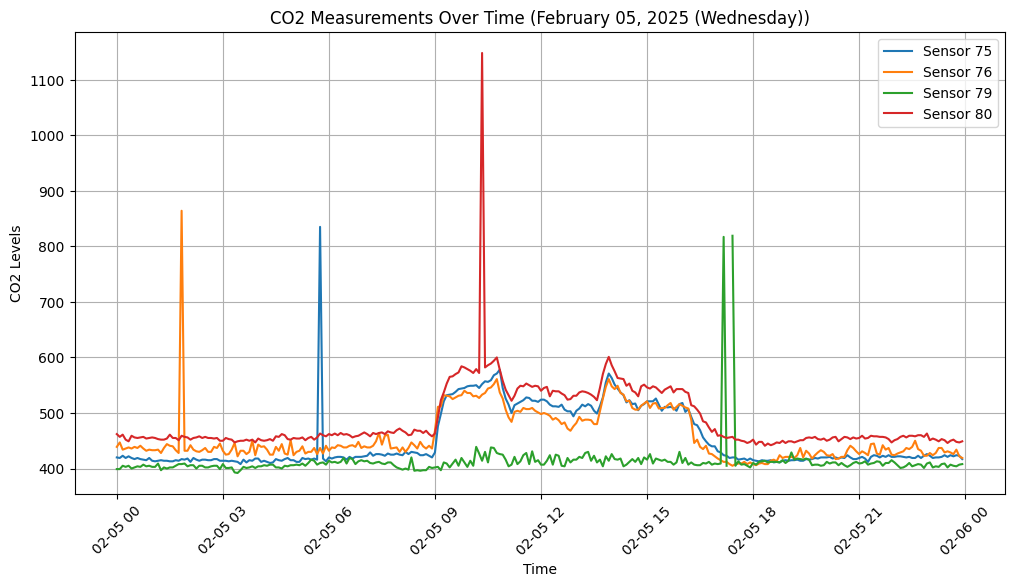

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


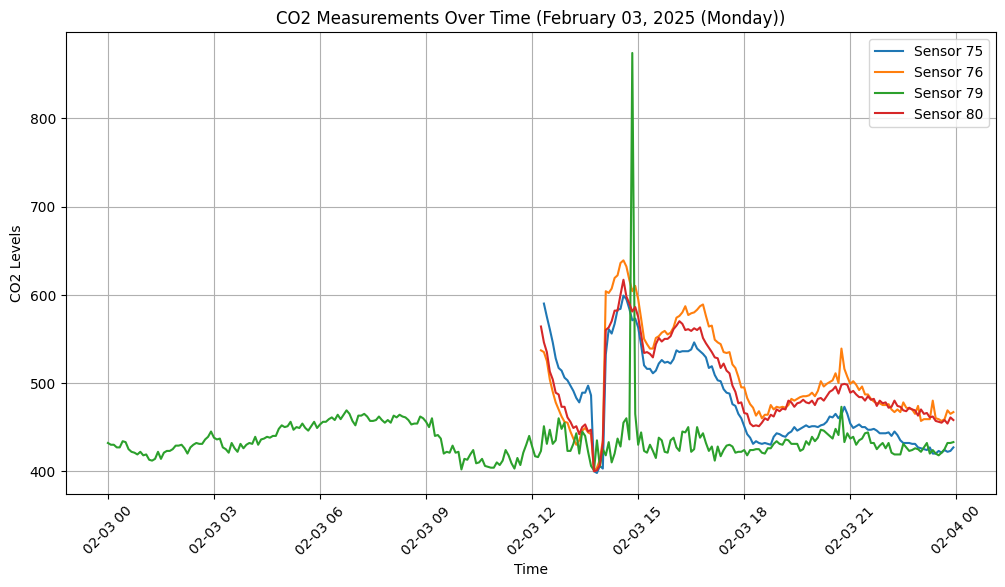

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


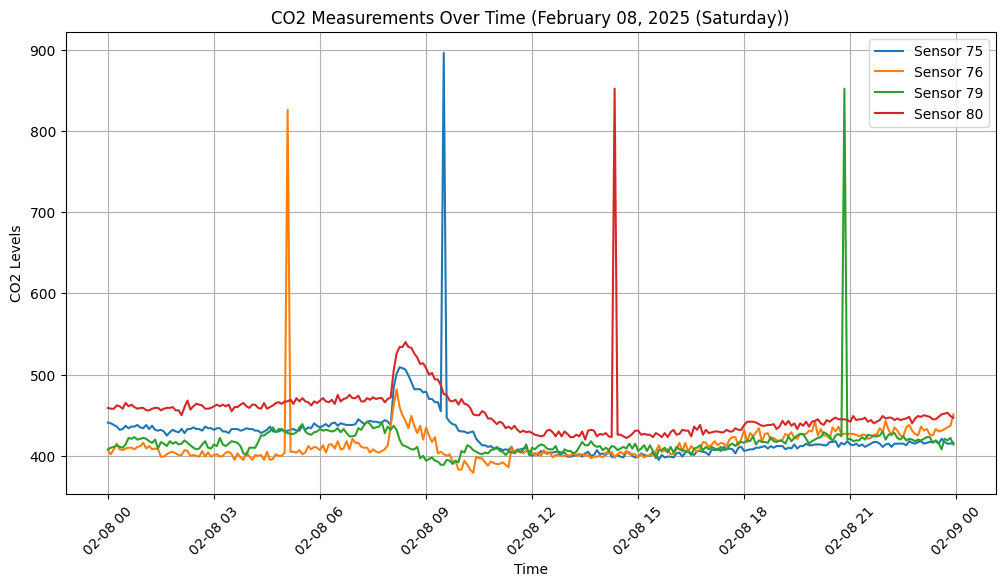

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


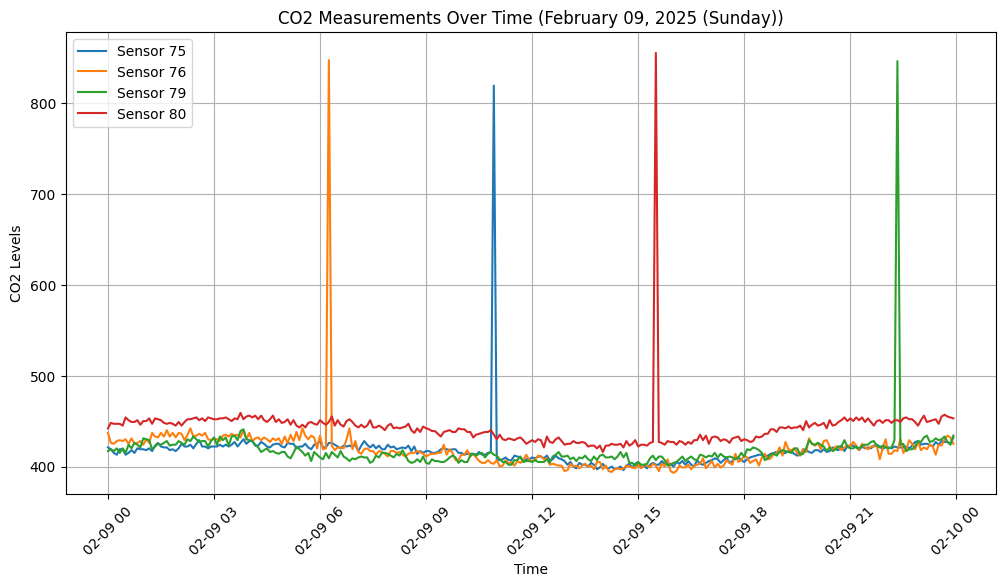

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


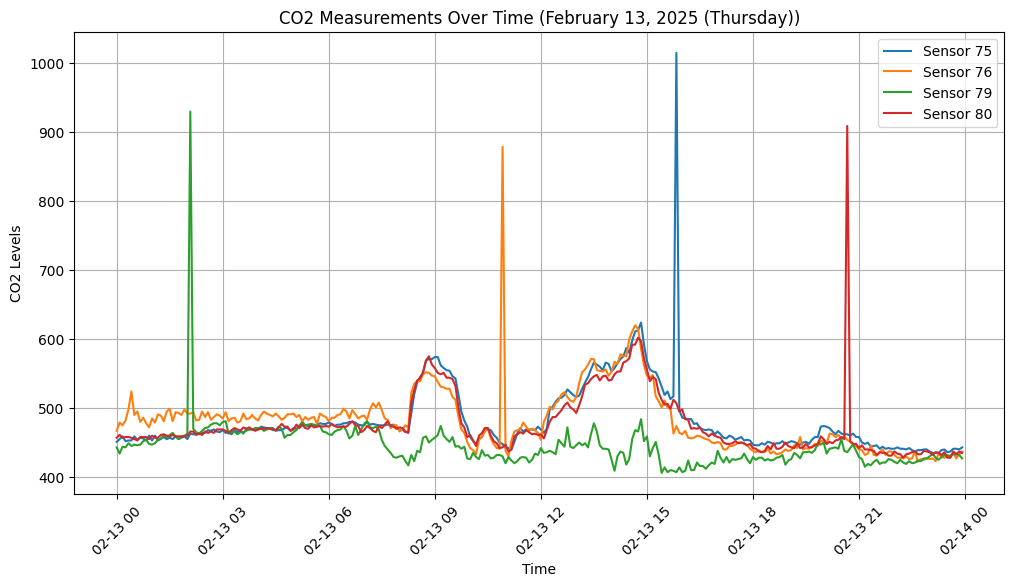

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


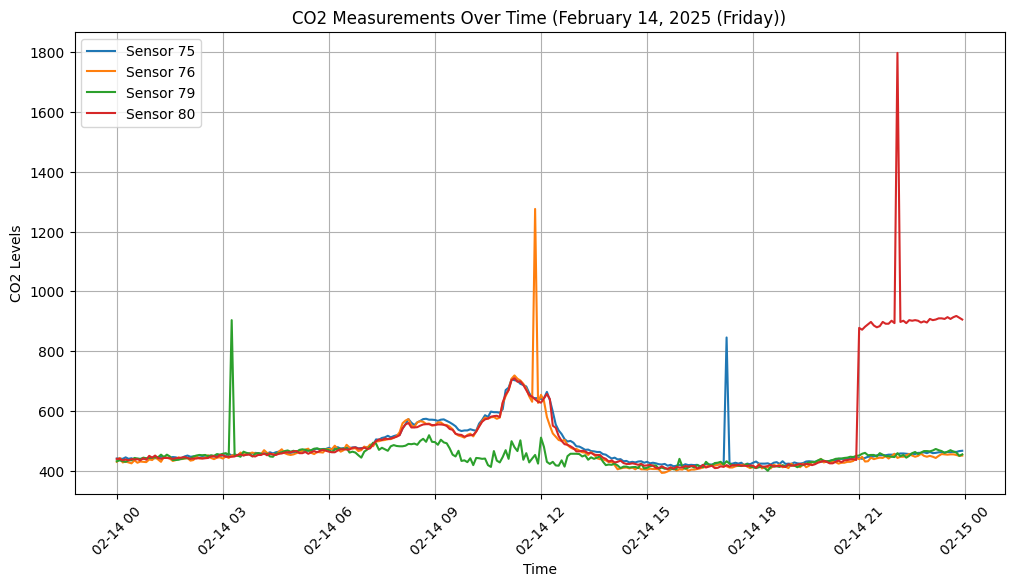

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


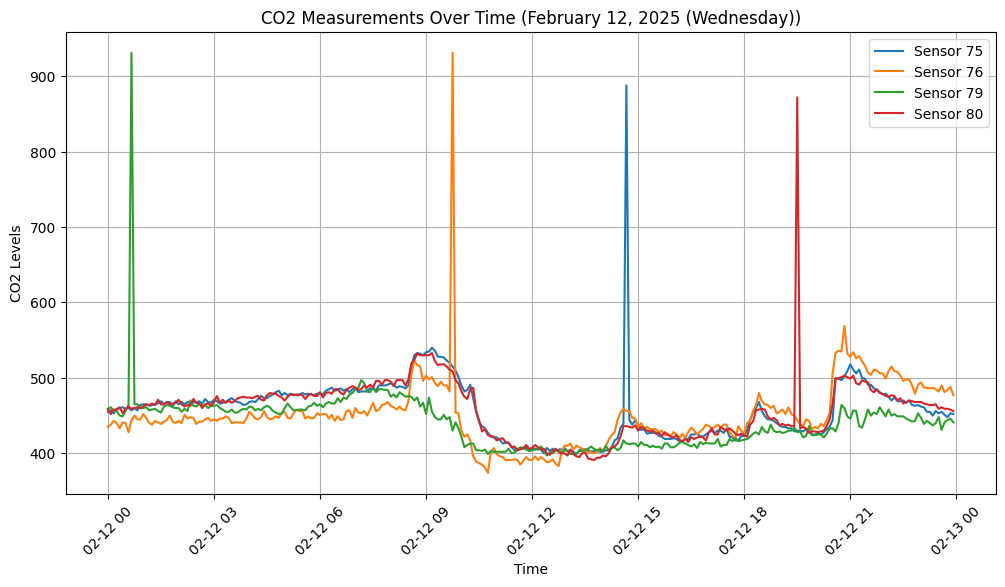

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


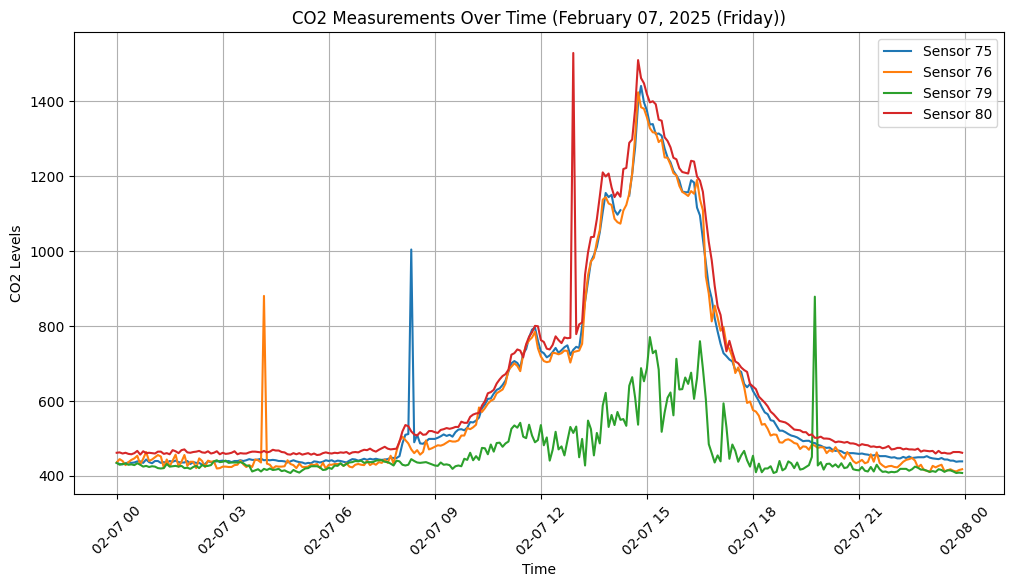

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


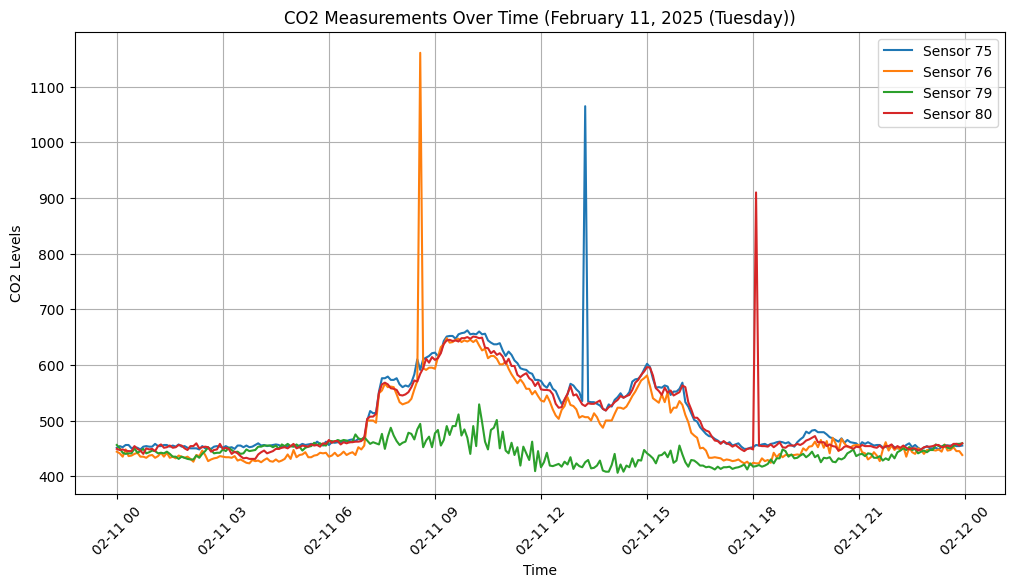

<ipython-input-6-07a0ff953e39>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


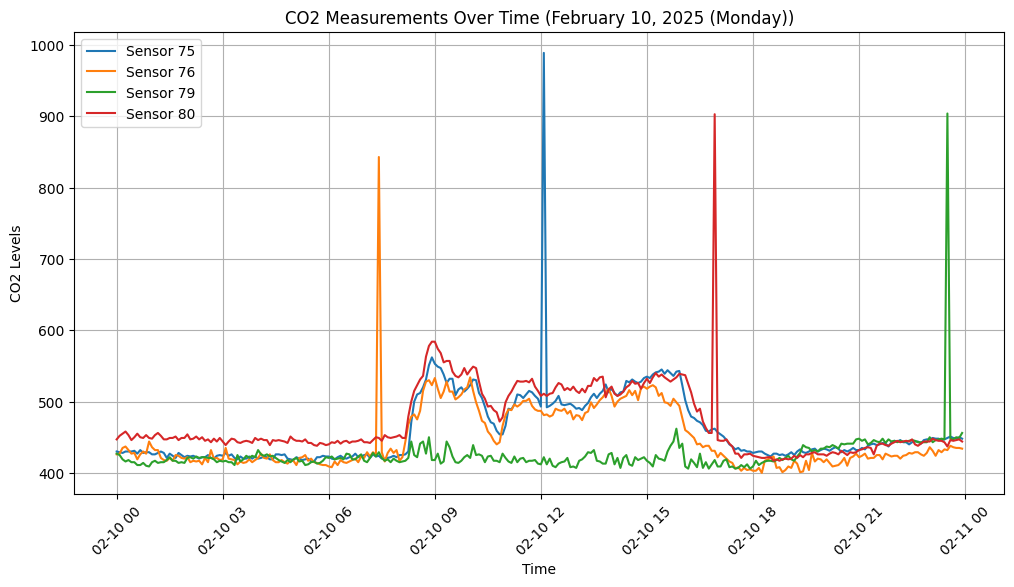

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/NEC 407 - Feb 3 - Feb 14"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Ensure Date and Time columns are strings
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Check if Datetime column exists and drop NaN values
    if 'Datetime' in df.columns:
        df = df.dropna(subset=['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        print(f"Skipping {file_path} due to Datetime parsing error")
        continue

    # Drop unnecessary columns
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')
    df = df[sensor_columns]

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Extract date and day
    date_obj = pd.to_datetime(df.index[0]).strftime('%B %d, %Y (%A)') if not df.empty else "Unknown Date"

    # Plot the data if there is valid data
    if not df.empty:
        plt.figure(figsize=(12, 6))
        for sensor in df.columns:
            plt.plot(df.index, df[sensor], label=f'Sensor {sensor}')

        plt.xlabel('Time')
        plt.ylabel('CO2 Levels')
        plt.title(f'CO2 Measurements Over Time ({date_obj})')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


# **Line Graph acc to work hours ( 7 am to 5 pm )**

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


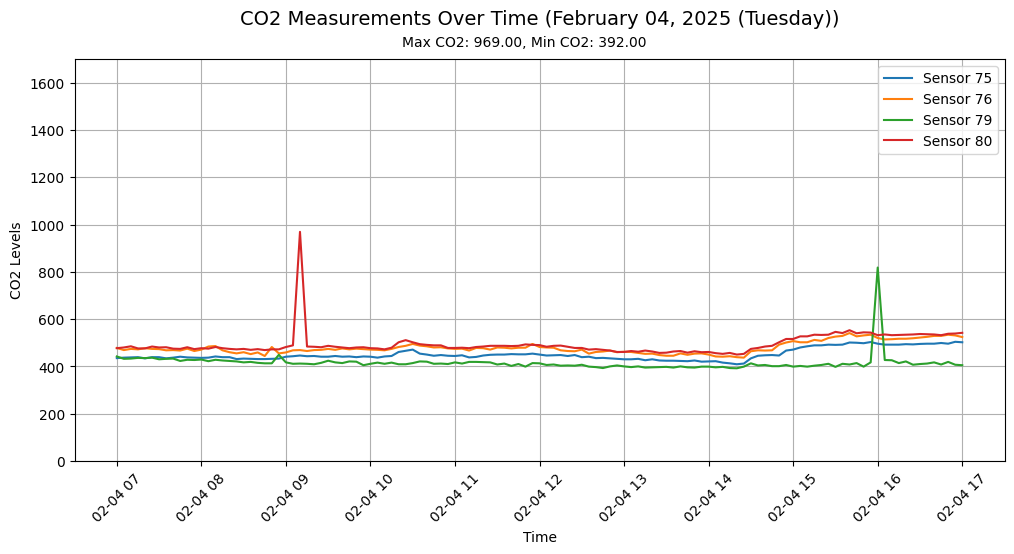

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


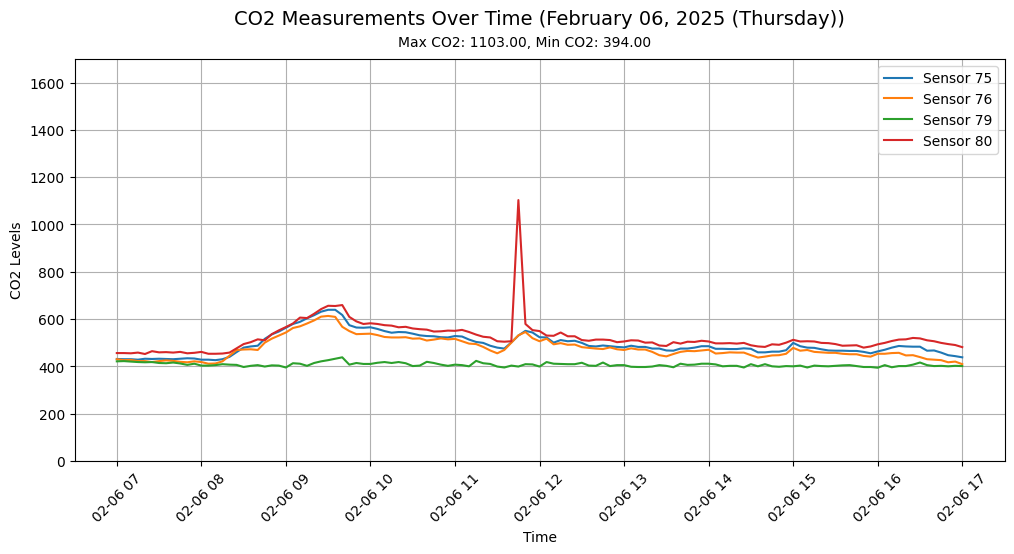

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


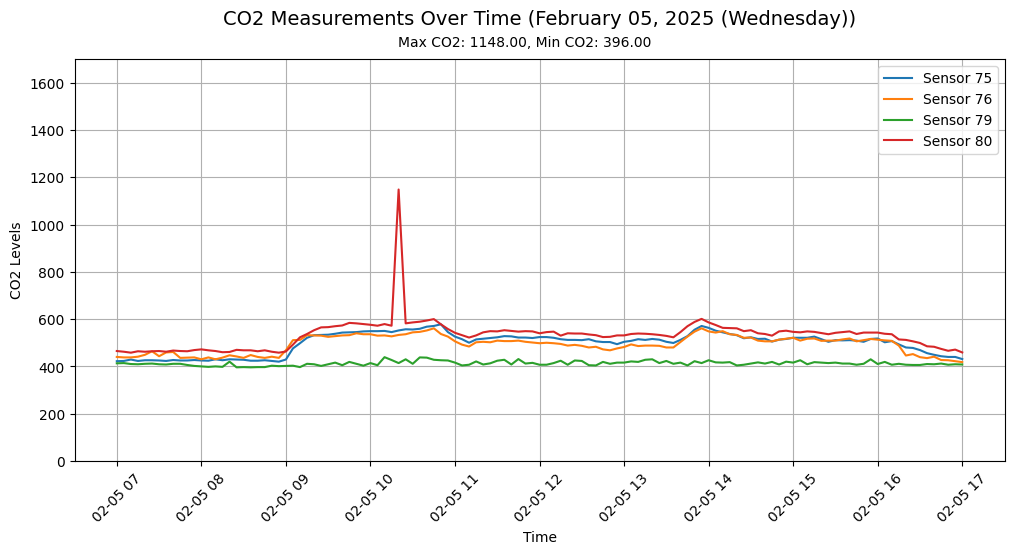

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


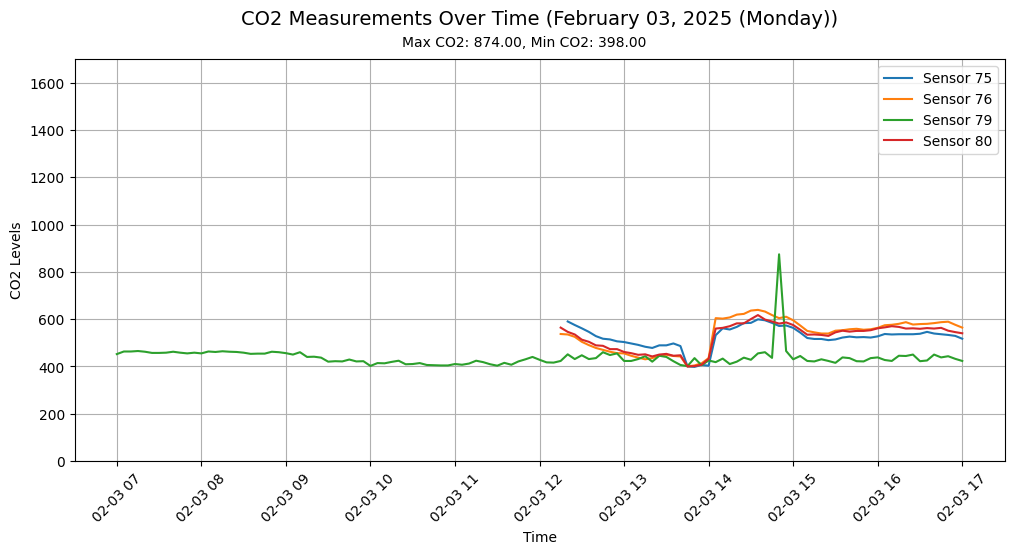

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


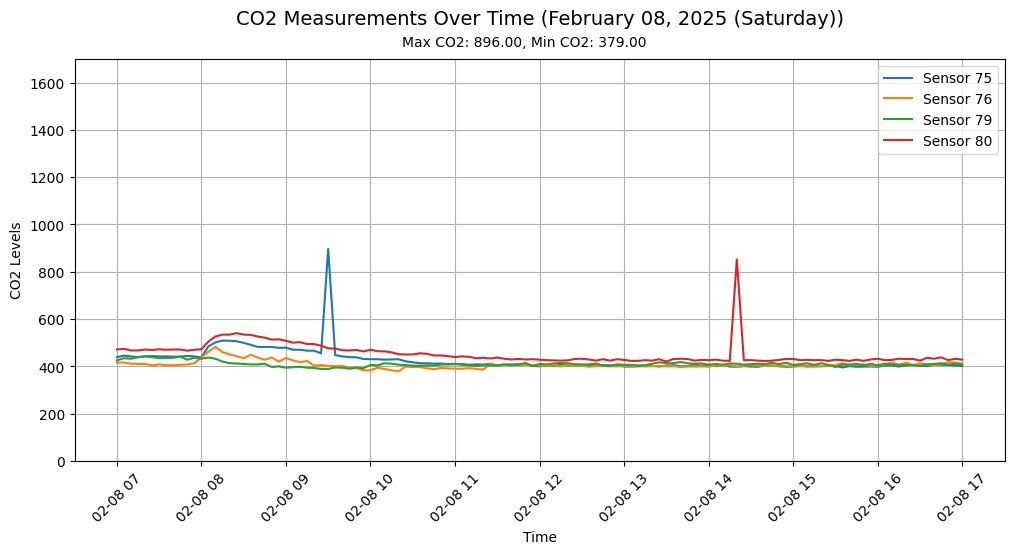

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


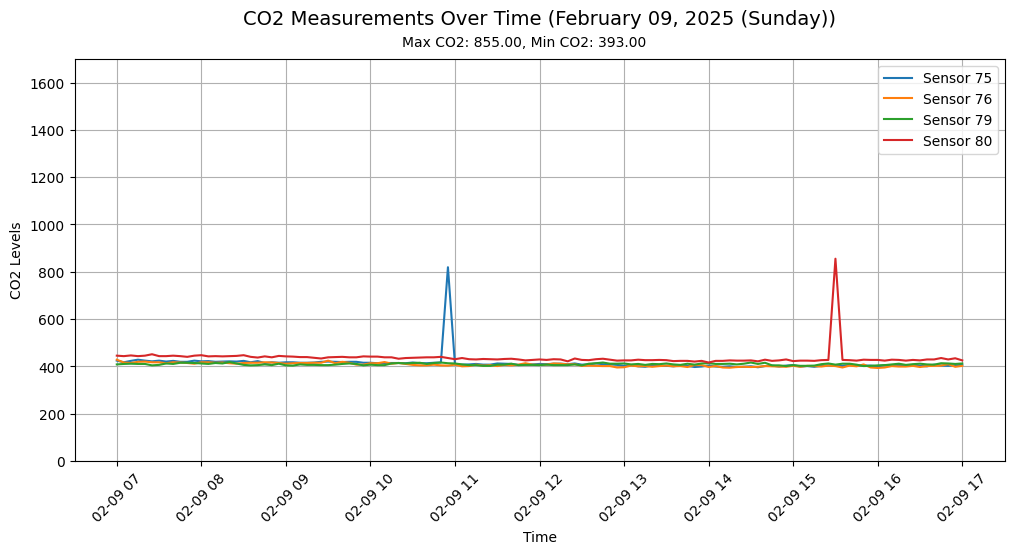

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


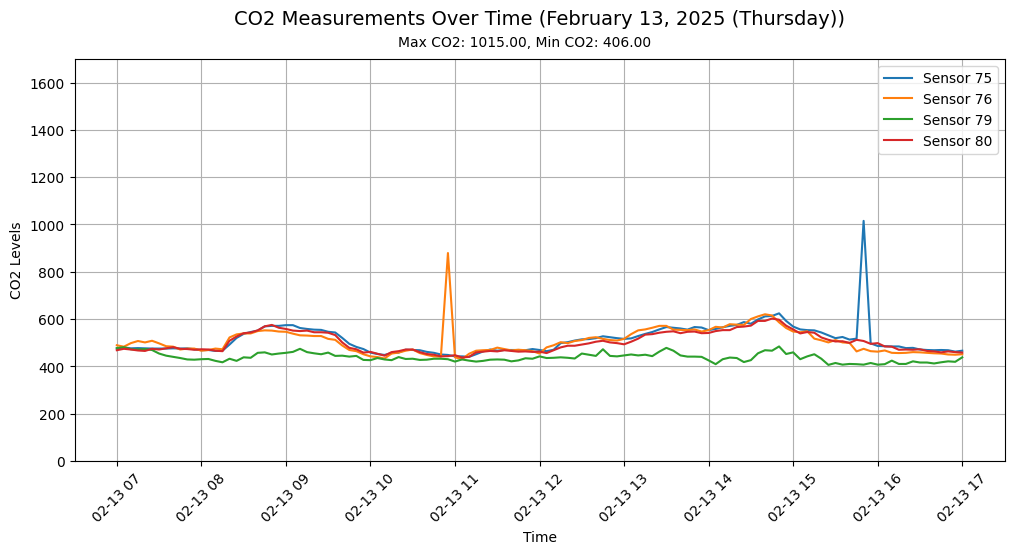

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


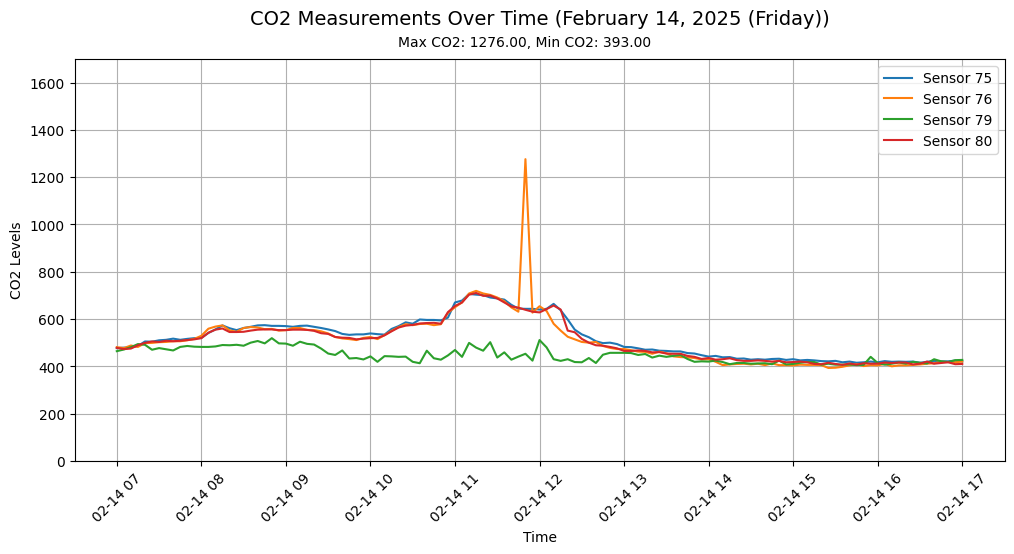

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


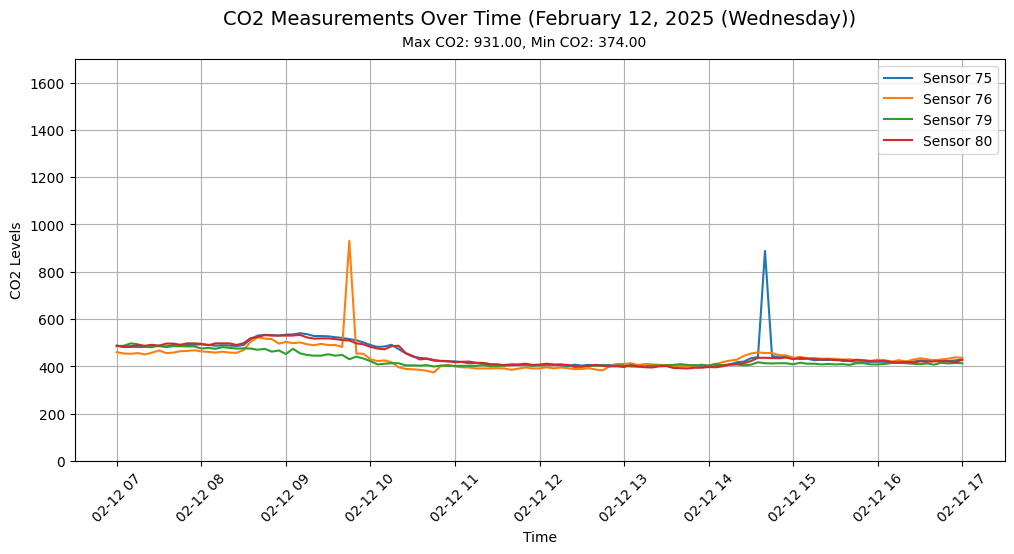

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


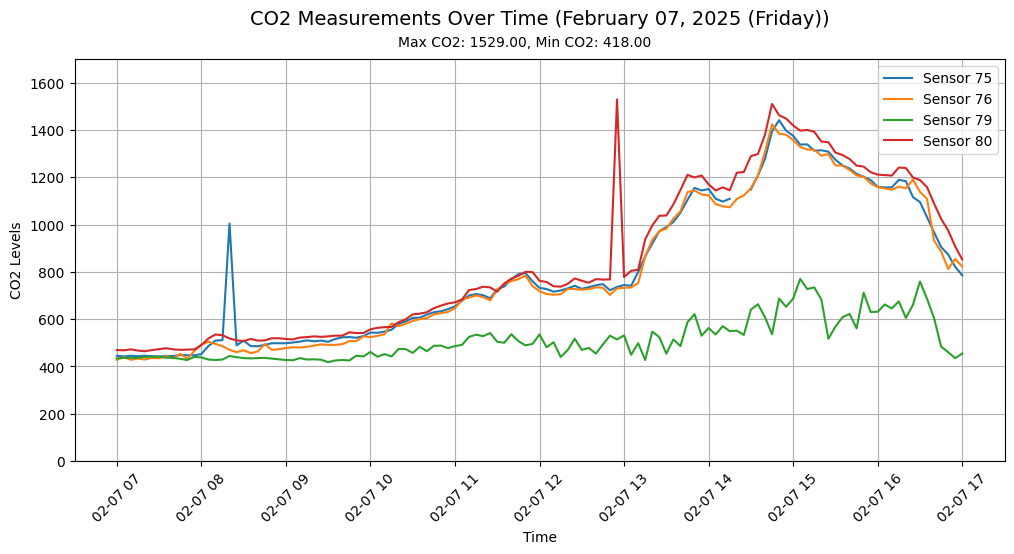

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


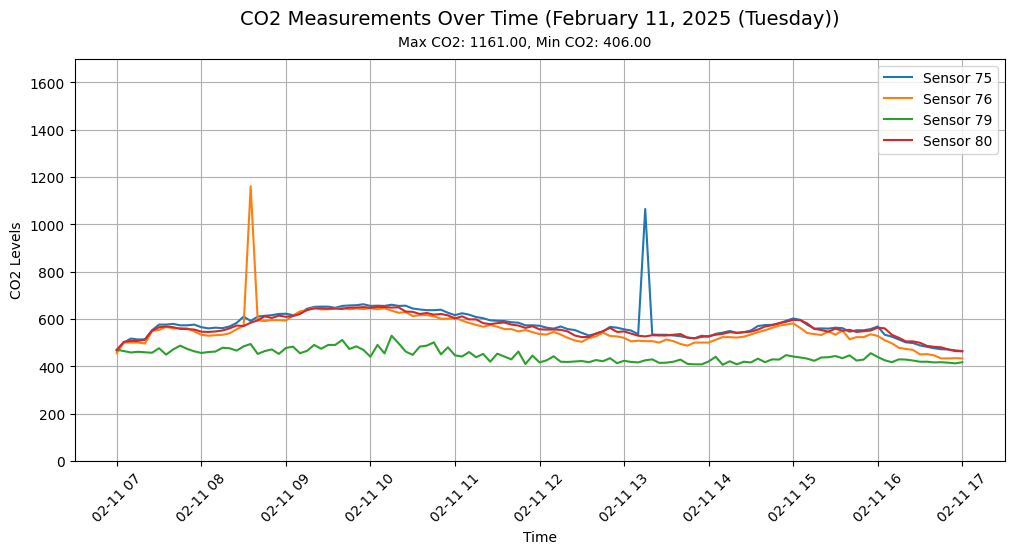

<ipython-input-7-9632cb0a69b9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


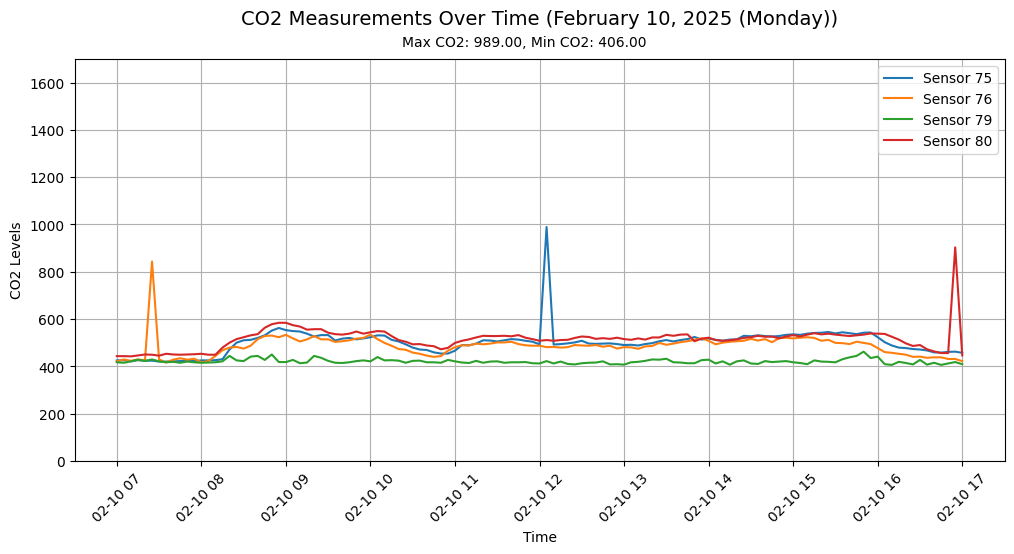

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/NEC 407 - Feb 3 - Feb 14"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Ensure Date and Time columns are strings
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Check if Datetime column exists and drop NaN values
    if 'Datetime' in df.columns:
        df = df.dropna(subset=['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        print(f"Skipping {file_path} due to Datetime parsing error")
        continue

    # Convert index to time-based filtering
    df = df.between_time('07:00', '17:00')  # Filter for office hours (7 AM - 5 PM)

    # Drop unnecessary columns
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')
    df = df[sensor_columns]

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Extract date and day
    date_obj = pd.to_datetime(df.index[0]).strftime('%B %d, %Y (%A)') if not df.empty else "Unknown Date"

    # Calculate min and max values
    min_value = df.min().min() if not df.empty else None
    max_value = df.max().max() if not df.empty else None

    # Plot the data if there is valid data
    if not df.empty:
        plt.figure(figsize=(12, 6))

        for sensor in df.columns:
            plt.plot(df.index, df[sensor], label=f'Sensor {sensor}')

        plt.xlabel('Time')
        plt.ylabel('CO2 Levels')
        plt.ylim(0, 1700)  # Set y-axis limit

        # Set title with extra padding
        plt.title(f'CO2 Measurements Over Time ({date_obj})', fontsize=14, pad=25)

        # Add min/max CO2 as a separate text below the title
        plt.figtext(0.5, 0.82, f'Max CO2: {max_value:.2f}, Min CO2: {min_value:.2f}',
                    fontsize=10, ha='center', va='top')

        # Adjust layout to prevent overlapping
        plt.subplots_adjust(top=0.78)  # Move plot area slightly down

        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


# **Line Graph Cleaned**

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


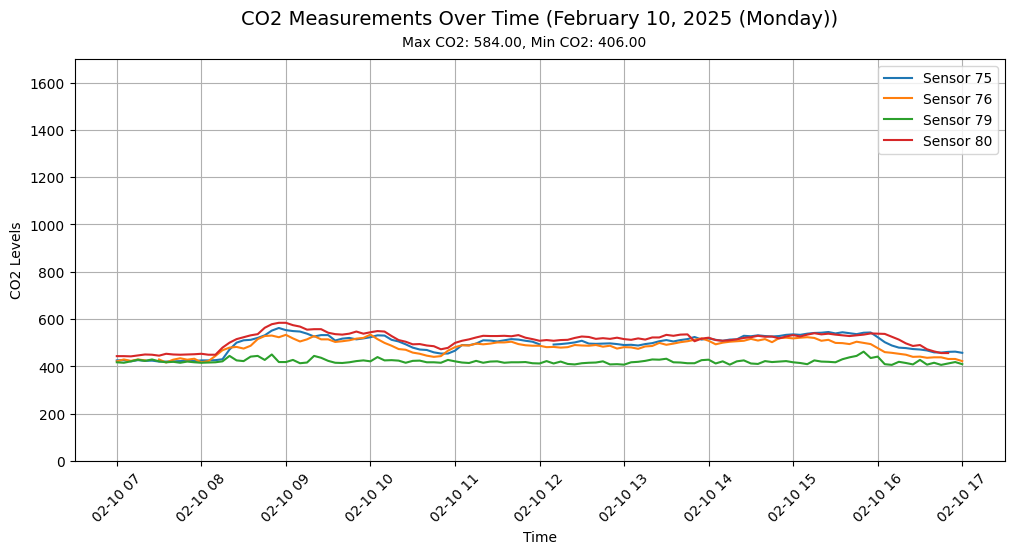

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


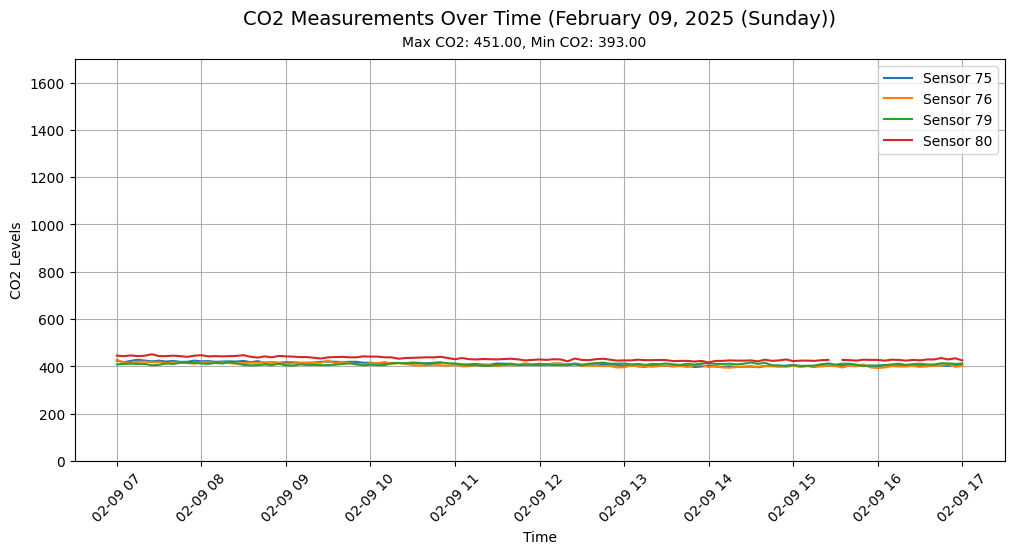

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


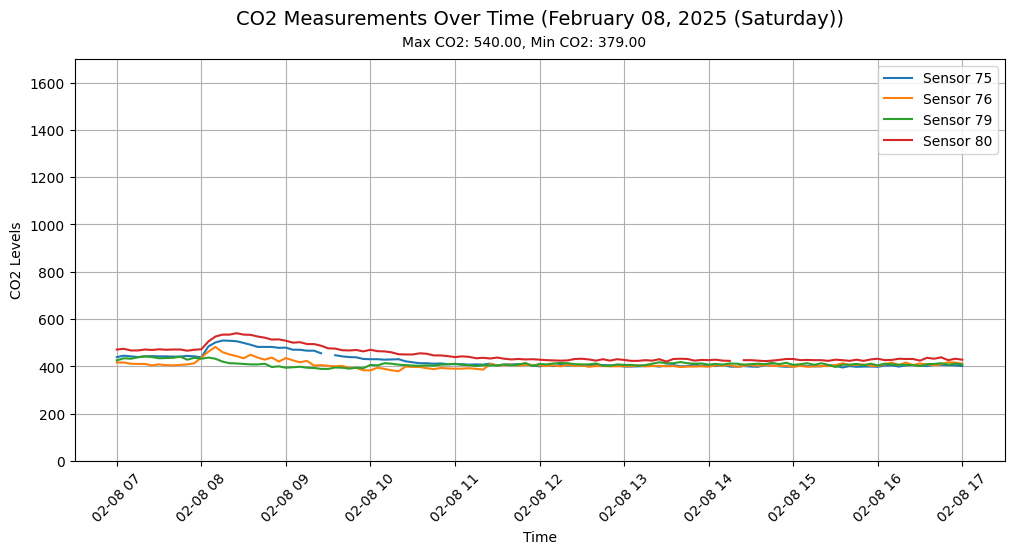

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


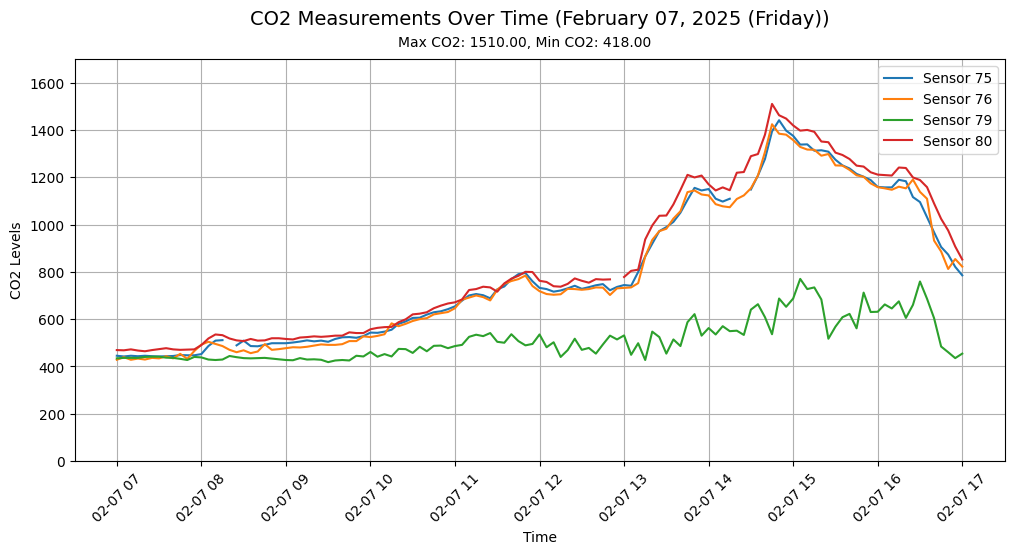

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


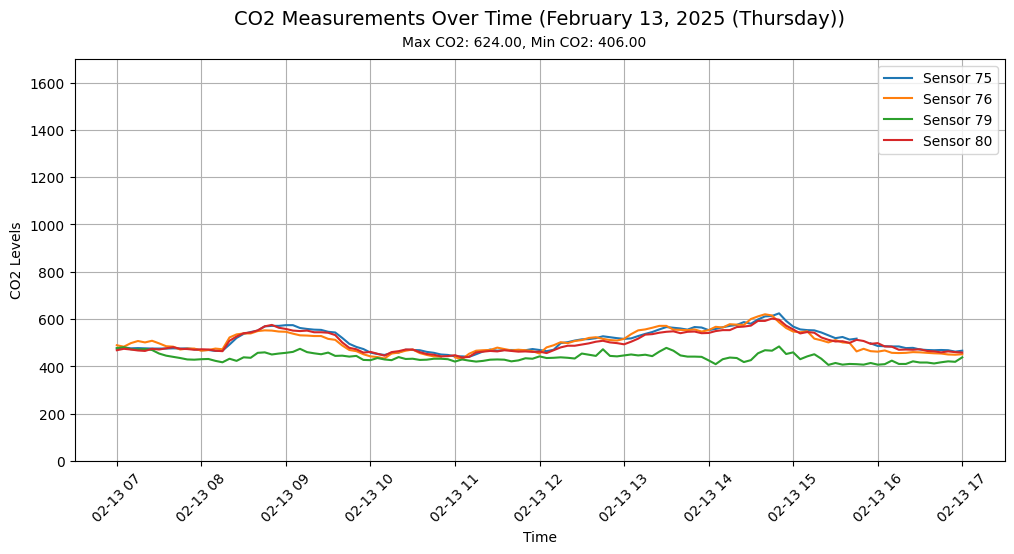

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


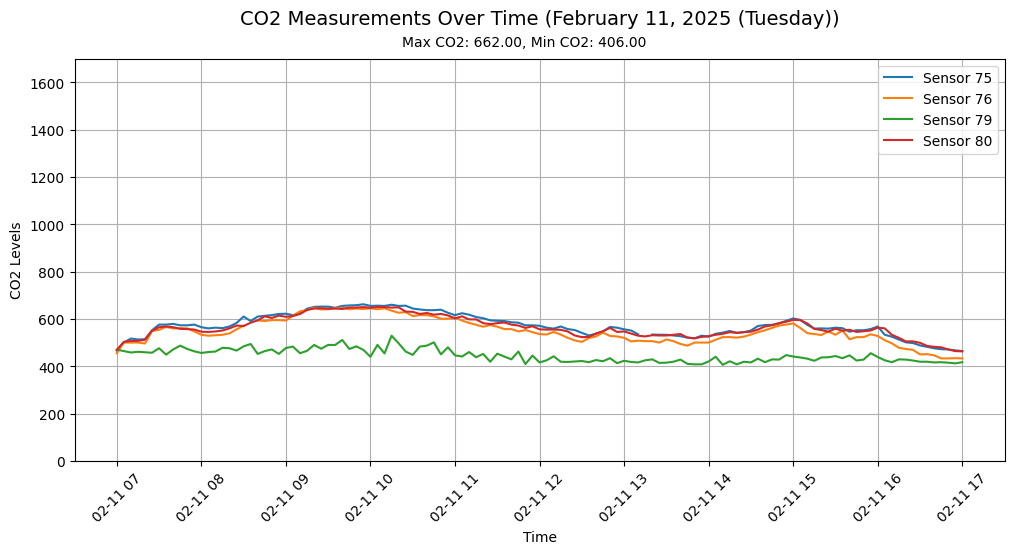

<ipython-input-14-6f30a7b4baf9>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


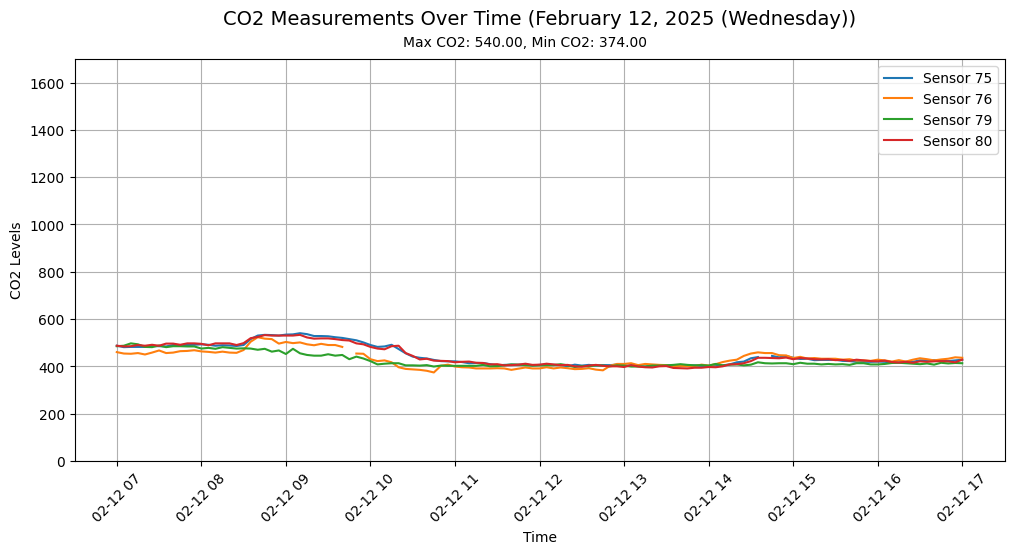

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/NEC 407 - Feb 3 - Feb 14/Cleaned"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Ensure Date and Time columns are strings
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Check if Datetime column exists and drop NaN values
    if 'Datetime' in df.columns:
        df = df.dropna(subset=['Datetime'])
        df.set_index('Datetime', inplace=True)
    else:
        print(f"Skipping {file_path} due to Datetime parsing error")
        continue

    # Convert index to time-based filtering
    df = df.between_time('07:00', '17:00')  # Filter for office hours (7 AM - 5 PM)

    # Drop unnecessary columns
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')
    df = df[sensor_columns]

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Extract date and day
    date_obj = pd.to_datetime(df.index[0]).strftime('%B %d, %Y (%A)') if not df.empty else "Unknown Date"

    # Calculate min and max values
    min_value = df.min().min() if not df.empty else None
    max_value = df.max().max() if not df.empty else None

    # Plot the data if there is valid data
    if not df.empty:
        plt.figure(figsize=(12, 6))

        for sensor in df.columns:
            plt.plot(df.index, df[sensor], label=f'Sensor {sensor}')

        plt.xlabel('Time')
        plt.ylabel('CO2 Levels')
        plt.ylim(0, 1700)  # Set y-axis limit

        # Set title with extra padding
        plt.title(f'CO2 Measurements Over Time ({date_obj})', fontsize=14, pad=25)

        # Add min/max CO2 as a separate text below the title
        plt.figtext(0.5, 0.82, f'Max CO2: {max_value:.2f}, Min CO2: {min_value:.2f}',
                    fontsize=10, ha='center', va='top')

        # Adjust layout to prevent overlapping
        plt.subplots_adjust(top=0.78)  # Move plot area slightly down

        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()


# **Sensor Correlation Matrix**


> Are all sensors capturing similar trends, or do some behave differently?



<ipython-input-15-2761393d3e88>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-15-2761393d3e88>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-15-2761393d3e88>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-15-2761393d3e88>:27: UserWarning: Could not infer format, so each element will 

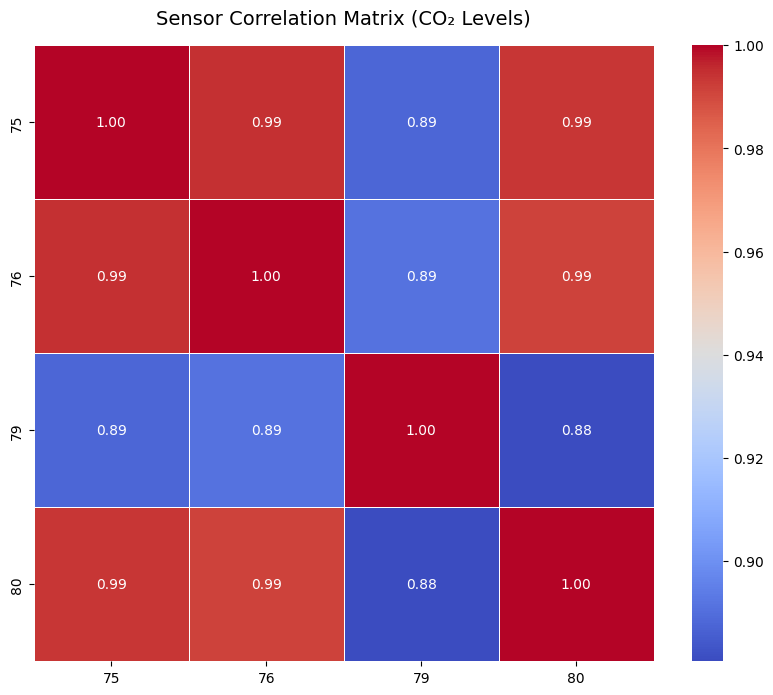

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/NEC 407 - Feb 3 - Feb 14/Cleaned"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
df_list = []

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Drop NaN values from datetime parsing
    df = df.dropna(subset=['Datetime'])
    df.set_index('Datetime', inplace=True)

    # Filter data for office hours (7 AM - 5 PM)
    df = df.between_time('07:00', '17:00')

    # Identify potential sensor columns (numeric only)
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]

    # Convert sensor columns to numeric, forcing errors to NaN
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Append to list if not empty
    if not df.empty:
        df_list.append(df)

# Combine all dataframes if there are multiple files
if df_list:
    combined_df = pd.concat(df_list)

    # Ensure we only use numeric columns for correlation analysis
    numeric_cols = combined_df.select_dtypes(include=['number']).columns
    correlation_matrix = combined_df[numeric_cols].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

    # Title
    plt.title("Sensor Correlation Matrix (CO₂ Levels)", fontsize=14, pad=15)
    plt.show()
else:
    print("No valid data found. Exiting script.")


## **Correlation Value	Meaning**

* **+1.0**	Perfect Positive Correlation (both sensors behave identically).
* **0.7 - 0.99**	Strong Positive Correlation (sensors show similar trends).
* **0.3 - 0.69**	Moderate Positive Correlation (some similarity but not perfect).
* **0.0 - 0.29**	Weak or No Correlation (sensors are independent).
* **-0.3 to -0.99**	Negative Correlation (when one increases, the other decreases).

**Sensors 75 & 76 (0.98 correlation)**
* These sensors are highly correlated, meaning they detect almost identical patterns.

**Possible reasons:**
* They are placed near each other.
* They measure CO₂ similarly in the same environment.

**Sensor 79 & Others (0.70 - 0.76 correlation)**
* Moderate correlation with other sensors.
* This suggests sensor 79 is in a slightly different location .

**Sensor 80 & Others (0.70 - 0.94 correlation)**
* Strong correlation with some sensors (0.93, 0.94) but slightly lower with sensor 79 (0.70).
* This may indicate that sensor 80 is in a different airflow zone or a separate room.


# **CO₂ Distribution Analysis**

<ipython-input-16-f1633a8c139d>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-16-f1633a8c139d>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-16-f1633a8c139d>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
<ipython-input-16-f1633a8c139d>:27: UserWarning: Could not infer format, so each element will 

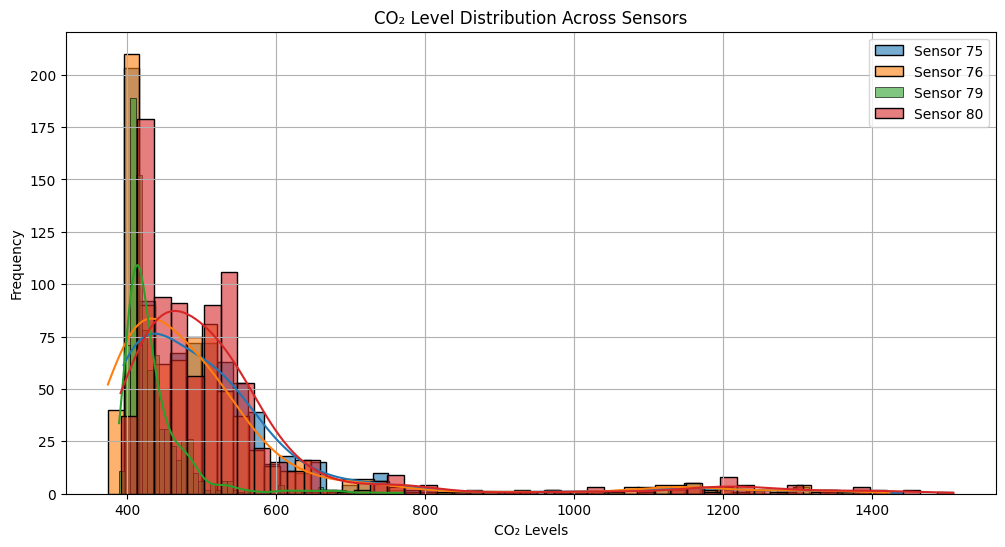

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Define folder path
folder_path = "/content/drive/MyDrive/2023 EPSL_SANTOS/03 - UP CARE/10 - Papers/P4 - CO2/NEC 407 - Feb 3 - Feb 14/Cleaned"
file_pattern = os.path.join(folder_path, "CO2 Measurements per date - *.csv")

# Get all matching files
files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
df_list = []

# Process each file
for file_path in files:
    df = pd.read_csv(file_path)

    # Ensure necessary columns exist
    if 'Date' not in df.columns or 'Time' not in df.columns:
        print(f"Skipping {file_path} due to missing Date or Time column")
        continue

    # Combine Date and Time into a single datetime column
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

    # Drop NaN values from datetime parsing
    df = df.dropna(subset=['Datetime'])
    df.set_index('Datetime', inplace=True)

    # Filter data for office hours (7 AM - 5 PM)
    df = df.between_time('07:00', '17:00')

    # Identify potential sensor columns (numeric only)
    sensor_columns = [col for col in df.columns if col not in ['Date', 'Time']]

    # Convert sensor columns to numeric, forcing errors to NaN
    df[sensor_columns] = df[sensor_columns].apply(pd.to_numeric, errors='coerce')

    # Drop rows with all NaN values in sensor data
    df = df.dropna(how='all')

    # Append to list if not empty
    if not df.empty:
        df_list.append(df)

# Combine all dataframes if there are multiple files
if df_list:
    combined_df = pd.concat(df_list)
else:
    print("No valid data found.")
    exit()

# Ensure we only use numeric columns
numeric_cols = combined_df.select_dtypes(include=['number']).columns
filtered_df = combined_df[numeric_cols]

# Create a histogram for CO₂ level distribution
plt.figure(figsize=(12, 6))
for sensor in filtered_df.columns:
    sns.histplot(filtered_df[sensor], bins=50, kde=True, label=f'Sensor {sensor}', alpha=0.6)

plt.xlabel("CO₂ Levels")
plt.ylabel("Frequency")
plt.title("CO₂ Level Distribution Across Sensors")
plt.legend()
plt.grid()
plt.show()


**Box (Interquartile Range - IQR)**
*   The box itself contains 50% of the data (from Q1 to Q3).
*   The line inside the box represents the median CO₂ level.

**Whiskers (Thin Lines Above & Below Box)**
*   These show the range of "normal" CO₂ levels.
*   Anything outside the whiskers is considered an outlier.

**Outliers (Dots Above & Below Whiskers)**
*   These are high or low CO₂ values that are much different from the usual range.

*   The more dots = more fluctuations in CO₂ levels.

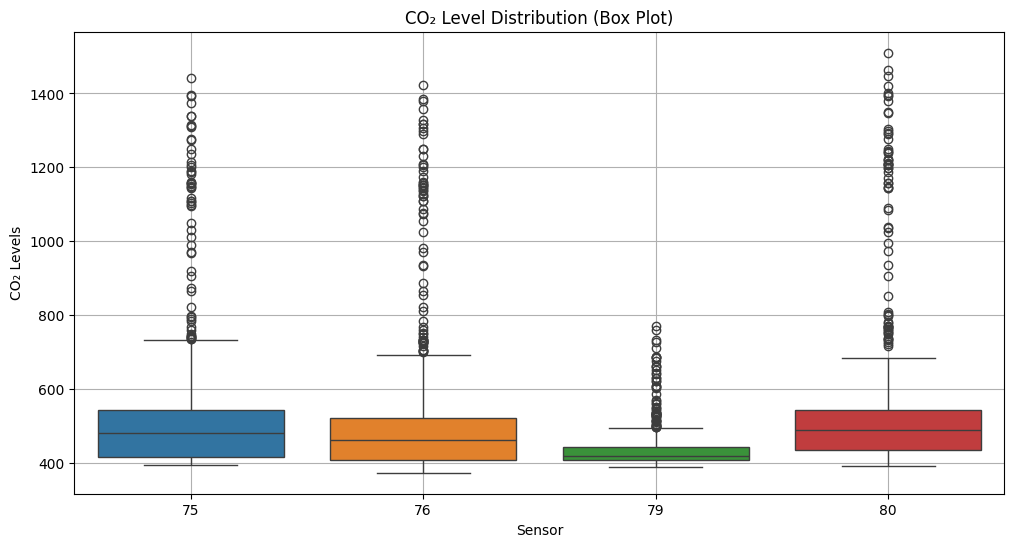

In [17]:
# Create a box plot to visualize sensor CO₂ distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df)

plt.xlabel("Sensor")
plt.ylabel("CO₂ Levels")
plt.title("CO₂ Level Distribution (Box Plot)")
plt.grid()
plt.show()

✅ **Sensor 79 (Green) Has the Lowest CO₂ Levels**

*   The box is narrower and lower than others.
*   This suggests that Sensor 79 is in a well-ventilated area.

✅ Sensor 80 (Red) Has Higher CO₂ Levels
* The box is higher than the others, meaning its CO₂ readings are consistently higher.
* The median CO₂ level is higher than other sensors.
* This might indicate that Sensor 80 is in a less-ventilated or high-occupancy area.


✅ Many Outliers (Dots Above 800-1400 ppm)
*   Sensors 75, 76, and 80 have CO₂ spikes exceeding 1000 ppm.
*   These outliers may indicate poor air circulation or specific events (e.g., meetings, crowded areas, or HVAC issues).



✅ General Range of CO₂ Levels

*   Most sensors have their main range (IQR) between 400 and 600 ppm, which is within normal air quality.

*   But some spikes go above 1000+ ppm, which could be a concern.